In [62]:
import numpy as np
import matplotlib.pyplot as plt

def original_objective_function(water_input, price):
    yield_term = -0.0038 * (10 + 0.1 * np.sqrt(water_input))**2 + 3.5542 * (10 + 0.1 * np.sqrt(water_input)) - 170.86
    cost_term = (5 + 0.005 * water_input) * water_input**1.1
    return price * yield_term - cost_term

def objective_function(water_input, price, t):
    # Original objective terms
    yield_term = -0.0038 * (10 + 0.1 * np.sqrt(water_input))**2 + 3.5542 * (10 + 0.1 * np.sqrt(water_input)) - 170.86
    cost_term = (5 + 0.005 * water_input) * water_input**1.1
    
    # Quadratic barrier term, penalizing negative water_input
    barrier_term = 1/t * max(0, -water_input)**2
    
    return price * yield_term - cost_term + barrier_term
    return price * yield_term - cost_term + barrier_term
def barrier_method_optimizer(price, initial_water_input, max_iterations, t_initial, t_multiplier):
    water_input = initial_water_input
    t = t_initial
    water_inputs = [water_input]
    objective_values = [objective_function(water_input, price, t)]
    
    for iteration in range(1, max_iterations):
        # Calculate the gradient
        gradient = objective_gradient(water_input, price, t)
        
        # Update the water input using gradient ascent
        water_input += 0.1 * gradient  # Small step size for stability
        water_input = max(water_input, 1e-6)  # Avoid zero or negative water input
        
        # Increase the penalty parameter t
        t *= t_multiplier
        
        # Store the history
        water_inputs.append(water_input)
        objective_values.append(objective_function(water_input, price, t))
    
    return water_input, water_inputs, objective_values

# Set the price
price = 420

# Set the barrier method hyperparameters
max_iterations = 50
initial_water_input = 10
t_initial = 4
t_multiplier = 1

# Run the barrier method optimizer and get the history
optimal_water_input, water_inputs, objective_values = barrier_method_optimizer(price, initial_water_input, max_iterations, t_initial, t_multiplier)

print("Optimal Water Input:", optimal_water_input)
print("Optimal Objective Value:", objective_function(optimal_water_input, price, t_initial))

Optimal Water Input: 40.07215678319836
Optimal Objective Value: -56370.45966851653


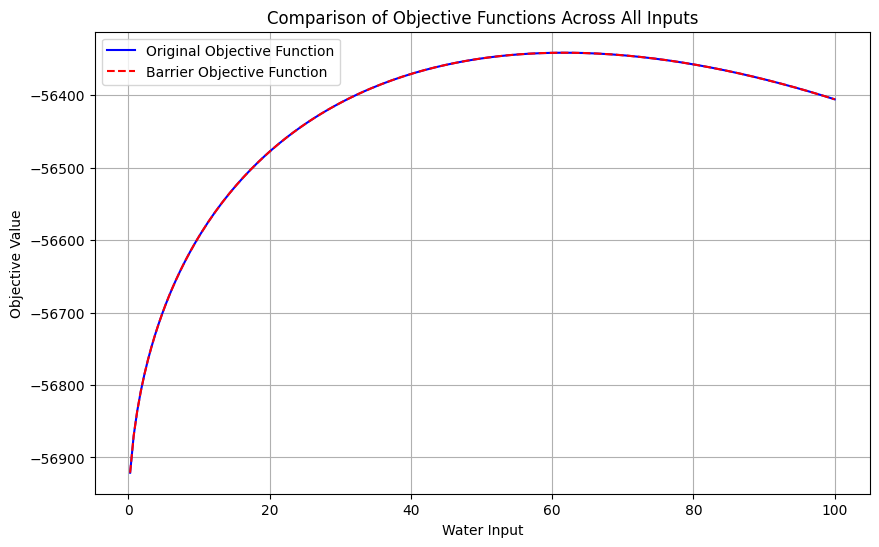

In [69]:
# Calculate objective values for a range including negative values
input_range = np.linspace(-100, 100, 400)

# Adjusted function calculations
original_values = []
barrier_values = []
for w in input_range:
    if w >= 0:
        original_val = original_objective_function(w, price)
        barrier_val = objective_function(w, price, t_initial)
    else:
        # Define behavior for negative inputs if necessary
        original_val = None  # or some other definition
        barrier_val = None  # or some other definition
    original_values.append(original_val)
    barrier_values.append(barrier_val)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(input_range, original_values, label='Original Objective Function', color='blue')
plt.plot(input_range, barrier_values, label='Barrier Objective Function', color='red', linestyle='--')
plt.title('Comparison of Objective Functions Across All Inputs')
plt.xlabel('Water Input')
plt.ylabel('Objective Value')
plt.legend()
plt.grid(True)
plt.show()